# IMDB_Sentiment_Analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("IMDB Dataset.csv")
df.head()
df.shape


(50000, 2)

In [14]:
vc_df = pd.DataFrame(df["sentiment"].value_counts()).reset_index()
vc_df.columns =["Sentiment","Count"]
vc_df["Sentiment"]= vc_df["Sentiment"].map({1:'positive',0:'negative'})
vc_df

,Sentiment,Count
0,NaN,25000
1,NaN,25000


In [15]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Pre-processing the data
"""Some common problems
1.Replace Punctuation
2.Replace short words
3.Making text lower case
4.Remove stopwaords
5.Lemmatization"""


In [16]:
#Remove Punctuation
# Replacing punctuaions with space

df['review_processed'] = df['review'].str.replace('[^a-zA-Z0-9]+', ' ')


#reordering the columns
df= df[['review','review_processed','sentiment']]


C:\Users\Prajin\AppData\Local\Temp\ipykernel_25572\202767749.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df['review'].str.replace('[^a-zA-Z0-9]+', ' ')


In [17]:
df['review_processed']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production br br The filmin...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s Love in the Time of Money is a...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review_processed, Length: 50000, dtype: object

In [18]:
# Replacing short words

df['review_processed']=df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['review_processed']

0        One the other reviewers has mentioned that aft...
1        wonderful little production The filming techni...
2        thought this was wonderful way spend time too ...
3        Basically there family where little boy Jake t...
4        Petter Mattei Love the Time Money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the Star Trek movies high art but ...
Name: review_processed, Length: 50000, dtype: object

In [19]:
#make entire rowtext  in lower case

df['review_processed']=[row.lower() for row in df['review_processed']]
df['review_processed']

0        one the other reviewers has mentioned that aft...
1        wonderful little production the filming techni...
2        thought this was wonderful way spend time too ...
3        basically there family where little boy jake t...
4        petter mattei love the time money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the star trek movies high art but ...
Name: review_processed, Length: 50000, dtype: object

In [20]:
!pip install nltk


In [34]:
#remove stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words= stopwords.words('english') #extracting all stop words in english language 
stop_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prajin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prajin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
#making custom list of words to be removed
add_words=['movie','film','one','make','even','see','movies','get','makes','making','time','watch',
           'character','like','good','well','would','real']


#adding to the list of words

stop_words.extend(add_words)

#funciton to remove stopwords

def remove_stopwords(rev):
    #input: it will take row /review as an input
    #take the paragraphm, break into words, check if the word is a stop word, remove if stop word,combine the words into a para
    
    review_tokenized = word_tokenize(rev)
    rev_new= " ".join([i for i in review_tokenized if i not in stop_words])
    return rev_new

#removing stop words

df['review_processed']= [remove_stopwords(r) for r in df['review_processed']]
df['review_processed']

0        reviewers mentioned watching episode hooked ri...
1        wonderful little production filming technique ...
2        thought wonderful way spend hot summer weekend...
3        basically family little boy jake thinks zombie...
4        petter mattei love money visually stunning mat...
                               ...                        
49995    thought right job creative original first expe...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin se...
49999    expects star trek high art fans expect best ep...
Name: review_processed, Length: 50000, dtype: object

In [58]:
# lemmatization
#begin lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


#function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

#covert the detailed POS tag into shallow information

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# lemmatize sentence using pos tag
# word tokenize - > pos tag (detailed) - > wordnet tag (shallow pos) - > lemmatizer - > root word
#tokenize the sentence an find the POS tag for each token
      #output will be a list of tuples ->[(word, detailed_tag)]
#tuple of (token, wordnet_tag)
def lemmatize_sentence(sentence):
    nltk_tagged= nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output->[(word, shallow_tag)]
    lemmatized_sentence=[]
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, appedn the token as is
    
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df['review_processed']= df['review_processed'].apply(lambda x: lemmatize_sentence(x))   
            
           
        



        
         
            



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prajin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Prajin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prajin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [38]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet



nltk_tagged= nltk.pos_tag(nltk.word_tokenize("This batch is awesome"))
nltk_tagged


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prajin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Prajin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prajin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('This', 'DT'), ('batch', 'NN'), ('is', 'VBZ'), ('awesome', 'JJ')]

In [59]:
df['review_processed']

0        reviewer mention watch episode hook right exac...
1        wonderful little production film technique una...
2        think wonderful way spend hot summer weekend s...
3        basically family little boy jake think zombie ...
4        petter mattei love money visually stun mattei ...
                               ...                        
49995    think right job creative original first expect...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    go disagree previous comment side maltin secon...
49999    expect star trek high art fan expect best epis...
Name: review_processed, Length: 50000, dtype: object

In [60]:
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,reviewer mention watch episode hook right exac...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production film technique una...,positive
2,I thought this was a wonderful way to spend ti...,think wonderful way spend hot summer weekend s...,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love money visually stun mattei ...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,think right job creative original first expect...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogue bad act idiotic direct a...,negative
49997,I am a Catholic taught in parochial elementary...,catholic teach parochial elementary school nun...,negative
49998,I'm going to have to disagree with the previou...,go disagree previous comment side maltin secon...,negative


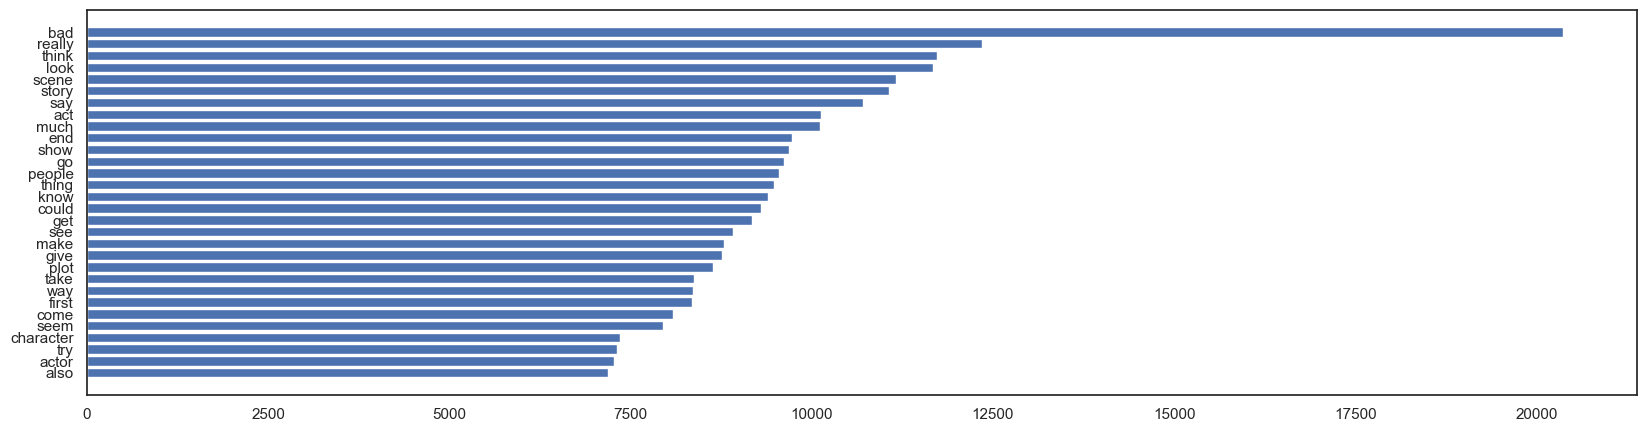

In [69]:
##Plotting most frequent words positive reviews using bar chart.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
from nltk import FreqDist  #function to find the frequent words in the data


#subset negative review dataset

all_words_df= df.loc[df['sentiment']=='negative',:]

#extract words into list and count frequency
all_words =' '.join([text for text in all_words_df['review_processed']])
all_words =all_words.split()
words_df = FreqDist(all_words)

#extracting words and frequence from words_df object

words_df= pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

#aubsets top 30 words by frequency

words_df= words_df.nlargest(columns='count', n=30)
words_df.sort_values('count', inplace= True)

#plotting 30 frequent words
plt.figure(figsize=(20,5))
ax=plt.barh(words_df['word'], width = words_df['count'])
plt.show()

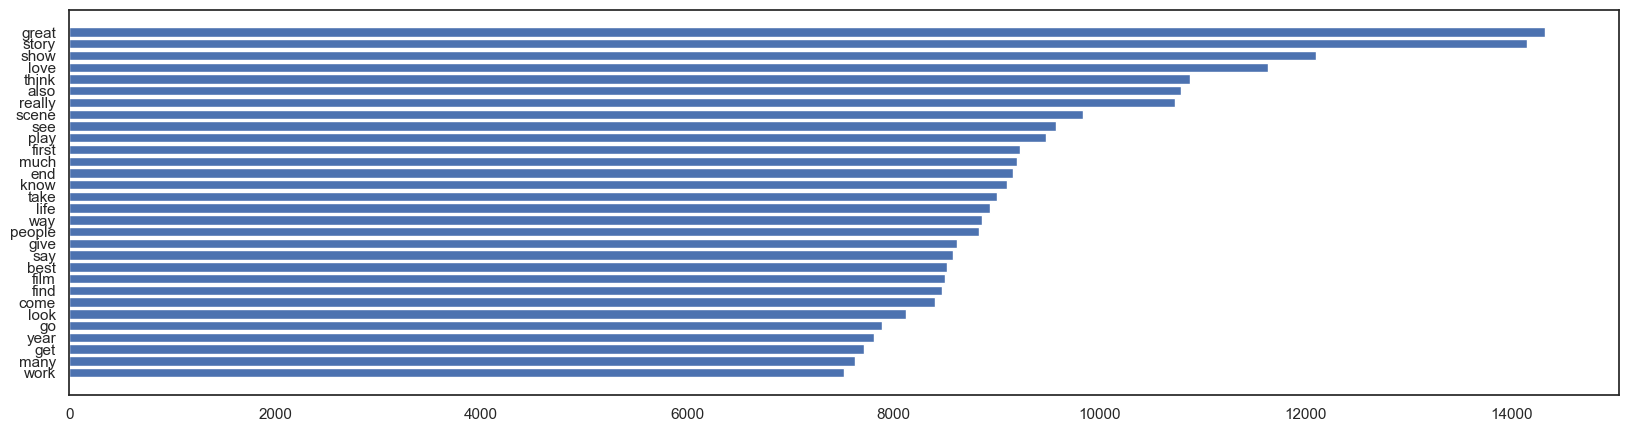

In [70]:
import seaborn as sns
sns.set(style='white')
from nltk import FreqDist  #function to find the frequent words in the data


#subset positive review dataset

all_words_df= df.loc[df['sentiment']=='positive',:]

#extract words into list and count frequency
all_words =' '.join([text for text in all_words_df['review_processed']])
all_words =all_words.split()
words_df = FreqDist(all_words)

#extracting words and frequence from words_df object

words_df= pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

#aubsets top 30 words by frequency

words_df= words_df.nlargest(columns='count', n=30)
words_df.sort_values('count', inplace= True)

#plotting 30 frequent words
plt.figure(figsize=(20,5))
ax=plt.barh(words_df['word'], width = words_df['count'])
plt.show()

# Word cloud 

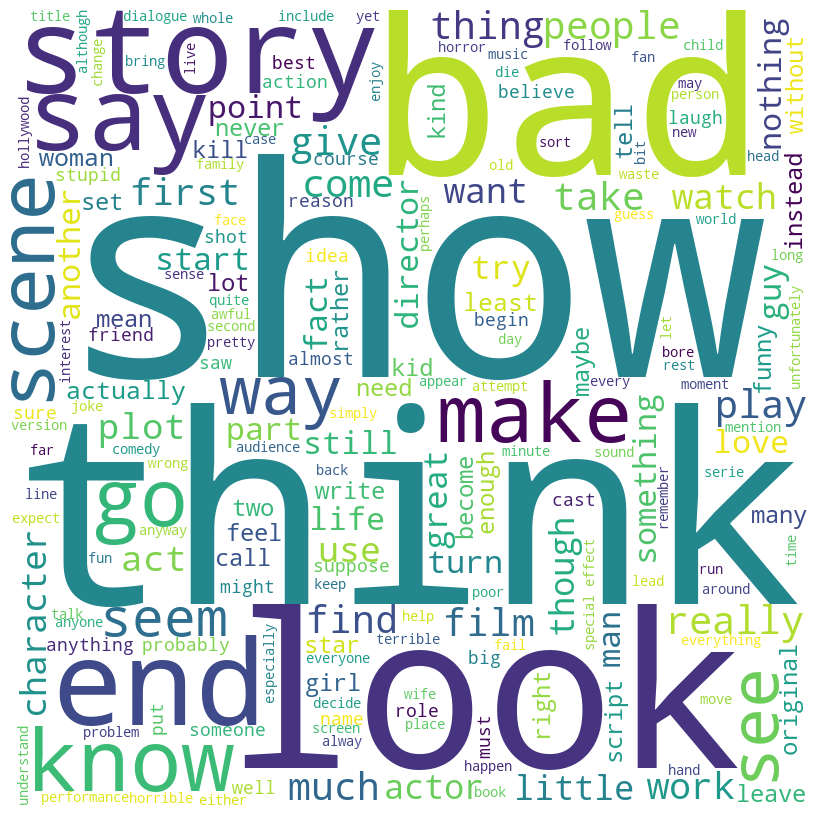

In [78]:
#Binding a word cloud
!pip install wordcloud



from wordcloud import WordCloud

word_cloud_df = df.loc[df['sentiment']== 'negative', :]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])

wordcloud = WordCloud(width =800, height =800, background_color ='white',                    
                      min_font_size =10). generate(all_words)
#plot the Wordcloud image
plt.figure(figsize=(8,8),facecolor= None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# bag of words model


In [83]:
#importing Module
from sklearn.feature_extraction.text import TfidfVectorizer

#creating matrix of top 2500 tokens
tfidf =TfidfVectorizer(max_features=2500)

#tmp_df =tfidf.fit_transform(df.review_processed)
#feature_names = tfdif.get_features_names()
#pd.DataFrame(tmp_df.toarray(), columns= feature_names).head()


X=tfidf.fit_transform(df.review_processed).toarray()
y=df.sentiment.map({'positive':1,'negative':0}).values
featureNames = tfidf.get_feature_names_out()
X,y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

In [86]:
#Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)


In [87]:
X_train.shape, X_test.shape

((40000, 2500), (10000, 2500))

# Build the ML model

In [88]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred= dt.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )


[[3587 1436]
 [1470 3507]]
The model accuracy is 0.7094


<Axes: >

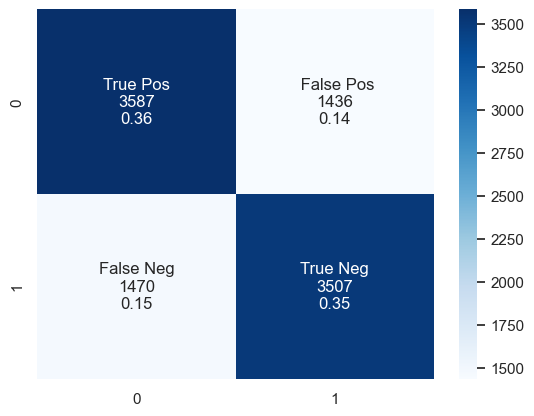

In [93]:
group_names =["True Pos"," False Pos","False Neg", "True Neg"]
group_counts =["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentage =["{0:.2f}".format(value) for value in cm.flatten()/np.sum(cm)]
labels =[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentage)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [101]:
from sklearn.metrics import roc_auc_score                    
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])



0.709378210442933

In [103]:
## featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i:j for i,j in zip (dt.feature_importances_,featureNames)}.items(),columns=['Importance','word'])
featureImportance.sort_values(by='Importance',ascending= False)

,Importance,word
105,0.134406,bad
1377,0.042468,waste
579,0.036638,great
100,0.022261,awful
890,0.015588,nothing
...,...,...
596,0.000049,hank
1235,0.000049,stupidity
1267,0.000049,tarzan
988,0.000033,pretend
